In [2]:
import numpy as np
import ternary
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.ticker as ticker
plt.rcParams['font.sans-serif'] = ['Arial']
import seaborn as sns
plt.rcParams['figure.figsize'] = (3, 3)
matplotlib.rcParams['figure.dpi'] = 200
import scipy
def _2gaussian(x_array, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))
def _1gaussian(x_array, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))
sns.set_context('talk')


In [80]:
#Load presynaptic ID and postsynaptic ID (presynaptic ID, postsynaptic ID)
syn_fn = 'Z:/fred/dec2019/3rdBatch_PVcreSecondImaging/blR/PrePostID.csv'
with open(syn_fn, 'r', encoding='utf-8-sig') as f: 
    synData = np.genfromtxt(f, dtype=int, delimiter=',')

    
#Code to rewrite axonIDs to arrange them from low to high with no gaps (i.e. 1,2,3,4...)
for i in range(1,224):
    if i not in synData:
        idx_max = np.argwhere(synData[:,0] == np.amax(synData[:,0]))
        synData[idx_max,0] = i    
    
#code to convert two columns into a matrix
synMatrix = np.zeros((synData.max()+1,synData.max()+1));
for i in range(0,len(synData)):
    synMatrix[synData[i,0],synData[i,1]] += 1;

neuronMatrix = np.zeros((7,7))
idx = [1,2,3,4,5,6,91];
#idx =  [x - 1 for x in idx];

for i, xvalue in enumerate(idx):
    for j, yvalue in enumerate(idx):
        neuronMatrix[i,j] = synMatrix[xvalue,yvalue]

#Delete zero columns
z_mask = np.any(synMatrix, axis = 0)
synMatrix = synMatrix[1:].compress(z_mask,axis=1)


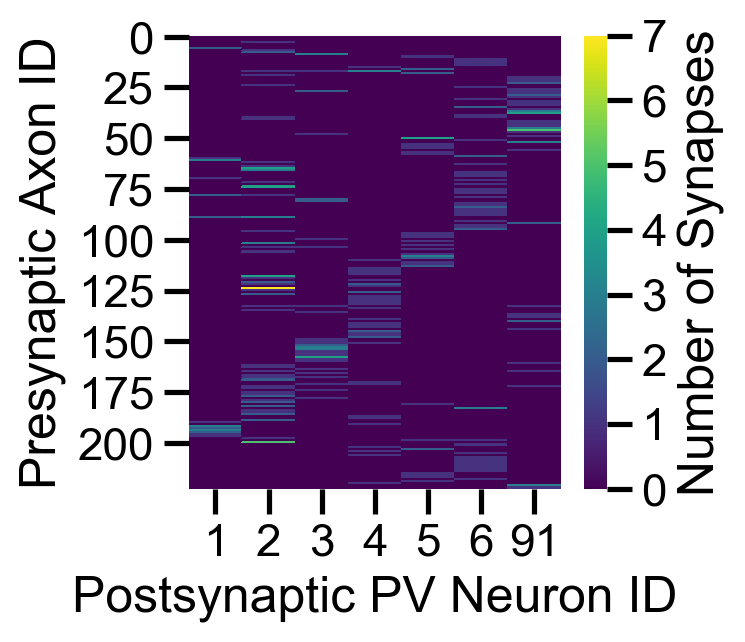

In [81]:

#Plot all axon to PV connectivity

ax = sns.heatmap(synMatrix, cmap = 'viridis', xticklabels = [1,2,3,4,5,6,91],linewidths = 0,rasterized=True)
ax.collections[0].colorbar.set_ticks(range(0,8))
#ax.set(ylim=(197,1))
ax.collections[0].colorbar.set_label('Number of Synapses')
ax.set_ylabel('Presynaptic Axon ID')
ax.set_xlabel('Postsynaptic PV Neuron ID')
out_fn = 'E:/MiRiEx/figures/sFig repeatFig3/allAxonNeuronHeatmap.svg'
#plt.savefig(out_fn, dpi=300)

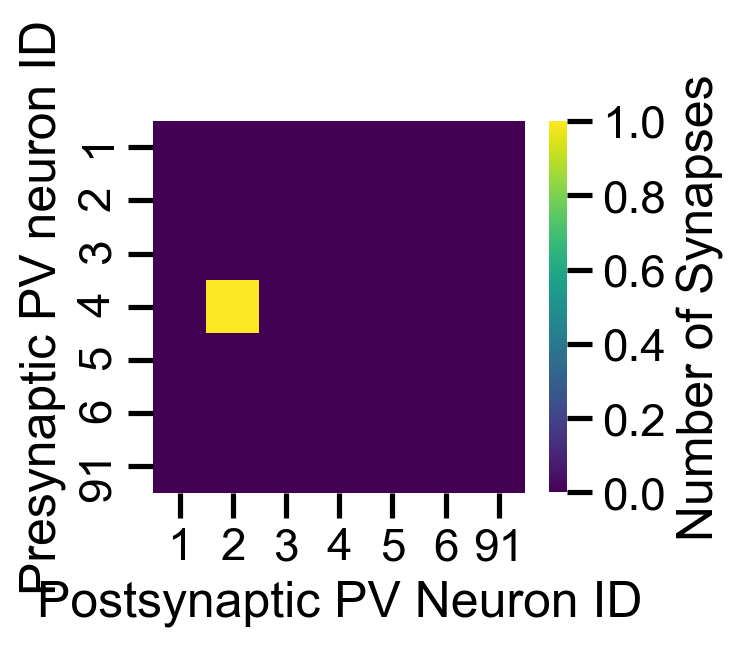

In [82]:
#Plot PV to PV connectivity

sns.set_context("talk")
ax = sns.heatmap(neuronMatrix, cmap = 'viridis', xticklabels =[1,2,3,4,5,6,91], yticklabels =[1,2,3,4,5,6,91],square = True,cbar_kws={"shrink": 0.82})
#ax.collections[0].colorbar.set_ticks(range(0,8))
ax.collections[0].colorbar.set_label('Number of Synapses')
ax.set_ylabel('Presynaptic PV neuron ID')
ax.set_xlabel('Postsynaptic PV Neuron ID')
sns.set_context("talk")
out_fn = 'E:/MiRiEx/figures/sFig repeatFig3/PVneuron_heat.svg'
plt.savefig(out_fn, dpi=300)